In [1]:
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [3]:
import os
import glob

In [5]:
# os.listdir('../research_data/')
glob.glob('../research_data/*geom*.pkl')

['../research_data/1mostly_compiled_dj11_geom.pkl']

In [6]:
f = '../research_data/1mostly_compiled_dj11_geom.pkl'
df = pd.DataFrame(pickle.load(open(f,'rb')))
print(df.shape)

(7431775, 22)


In [93]:
#hparams = hyper_params
hparams = ['adj_size','gamma','sigma','ridge_alpha','topo_p','remove_p','spect_rad']
for col in hparams:
    print(df[col].value_counts().sort_index())
    print()

500.0     2472109
1500.0    2481343
2500.0    2476858
Name: adj_size, dtype: int64

0.1     1385525
1.0     1241600
5.0     1230850
10.0    1214925
25.0    1205725
50.0    1152575
Name: gamma, dtype: int64

0.01     1244100
0.14     1224675
0.40     1264150
0.70     1261225
1.00     1252850
10.00    1184200
Name: sigma, dtype: int64

1.000000e-08    1489825
1.000000e-06    1487925
1.000000e-04    1485925
1.000000e-02    1486525
1.000000e+00    1481000
Name: ridge_alpha, dtype: int64

0.5    1823300
1.0    1833175
2.0    1817475
3.0    1776950
4.0     180300
Name: topo_p, dtype: int64

0.00    438650
0.10    438850
0.20    436625
0.30    435550
0.40    436375
0.50    437850
0.60    435750
0.70    438900
0.80    438225
0.86    437125
0.88    436450
0.90    435175
0.92    437600
0.94    435850
0.96    436600
0.98    438150
0.99    437475
Name: remove_p, dtype: int64

0.1     820125
0.9     832250
1.0     836950
1.1     825650
2.0     830350
5.0     828800
10.0    829425
25.0    824125
50.

In [42]:
import warnings
#from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore') 

In [119]:
unique_values = dict()
for col in ['adj_size','gamma','sigma','ridge_alpha','topo_p','spect_rad']:
    unique_values[col] = df[col].unique()

In [122]:
#manually remove nans
unique_values = {'adj_size': np.array([ 500., 2500., 1500.]),
 'gamma': np.array([ 1. ,  0.1,  5. , 10. , 25. , 50. ]),
 'sigma': np.array([ 0.4 ,  0.7 ,  0.01,  0.14,  1.  , 10.  ]),
 'ridge_alpha': np.array([1.e+00, 1.e-08, 1.e-02, 1.e-04, 1.e-06]),
 'topo_p': np.array([0.5, 1. , 2. , 3. , 4. ]),
 'spect_rad': np.array([50. , 25. ,  0.1,  0.9,  5. ,  1.1,  2. ,  1. , 10. ])}

In [126]:
for key in unique_values.keys():
    print(np.random.choice(unique_values[key]))

1500.0
0.1
10.0
1e-06
3.0
25.0


In [128]:
y = df.copy()
print(y.shape)
y.drop(index=y.loc[y['spect_rad'].isin([0.9, 1.0, 1.1, 5.0, 10.0, 25.0])].index ,inplace=True)
print(y.shape)

(7431775, 22)
(2454575, 22)


In [ ]:
all_sr_vals = [0.9, 1.0, 1.1, 5.0, 10.0, 25.0,0.1,  2.0, 50.0]
np.random.choice(all_sr_vals,3)

index:4838700
NumRows 1025


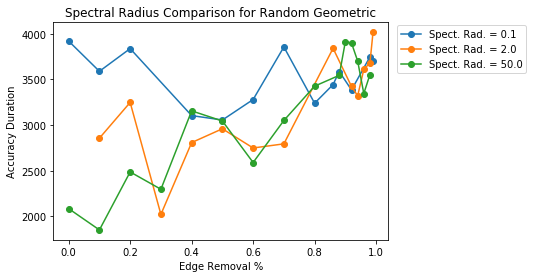

adj_size  gamma  sigma  ridge_alpha  topo_p  spect_rad
500.0     10.0   0.7    0.000001     2.0     50.0         375
                                             0.1          325
                                             2.0          325
dtype: int64



index:3175
NumRows 1050


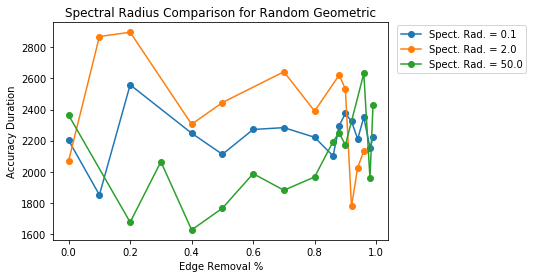

adj_size  gamma  sigma  ridge_alpha  topo_p  spect_rad
1500.0    1.0    0.4    0.01         0.5     0.1          400
                                             50.0         350
                                             2.0          300
dtype: int64



index:3579300
NumRows 1175


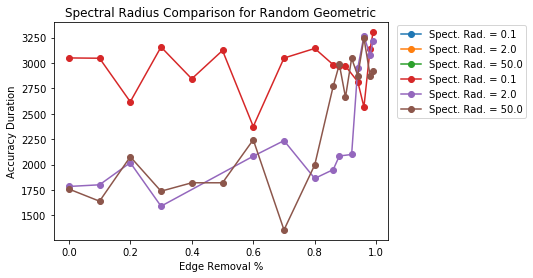

adj_size  gamma  sigma  ridge_alpha  topo_p  spect_rad
500.0     0.1    0.4    0.000001     2.0     50.0         425
                                             0.1          400
                                             2.0          350
dtype: int64



index:6308625
NumRows 1100


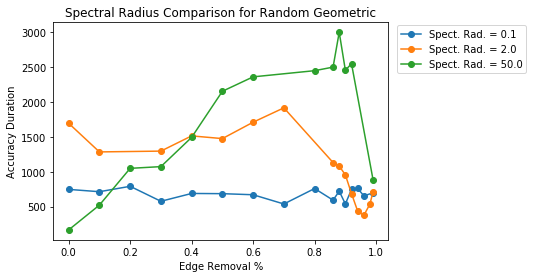

adj_size  gamma  sigma  ridge_alpha  topo_p  spect_rad
2500.0    10.0   0.01   0.01         3.0     0.1          400
                                             2.0          375
                                             50.0         325
dtype: int64





In [148]:
num_samples = 5
noised_samples = np.random.randint(0,df.shape[0],num_samples)
# noised_samples = [2648874]
for i in noised_samples:
    try:
        y = df.copy()
        for col in ['adj_size','gamma','sigma','ridge_alpha','topo_p']:
            val = np.random.choice(unique_values[col])
            try:
                y.drop(index=y.loc[y[col] != val].index ,inplace=True)
            except:
                print('drop failed')
        #for spect_rad in [0.1, 0.9, 1.0, 1.1, 2.0, 5.0, 10.0, 25.0, 50.0]:
        y.drop(index=y.loc[y['spect_rad'].isin([0.9, 1.0, 1.1, 5.0, 10.0, 25.0])].index ,inplace=True)
        for sr in [0.1,  2.0, 50.0]:
            temp = y.loc[y.spect_rad == sr].copy()
            S = temp.groupby(temp.remove_p).aggregate(np.mean).copy()
            # plt.plot(S.index,S.values) #if one topology
            plt.plot(S.index,S.mean_pred,'-o',label=f'Spect. Rad. = {sr}')

        plt.legend(bbox_to_anchor=(1.01,1.01))  
        print('index:' + str(y.index[0]) + f'\nNumRows {y.shape[0]}')
        plt.title('Spectral Radius Comparison for Random Geometric')
        plt.xlabel('Edge Removal %')
        plt.ylabel('Accuracy Duration')
        plt.show()
        print(y[['adj_size','gamma','sigma','ridge_alpha','topo_p','spect_rad']].value_counts())
        print('\n\n')
    except:
        pass

In [134]:
y[['adj_size','gamma','sigma','ridge_alpha','topo_p','spect_rad']].value_counts()

adj_size  gamma  sigma  ridge_alpha   topo_p  spect_rad
500.0     50.0   0.7    1.000000e-08  3.0     0.1          425
                                              50.0         400
                                              2.0          325
dtype: int64

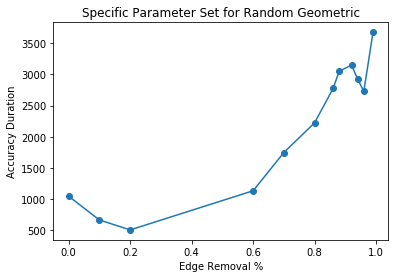

In [95]:
for i in []:
    x = df.iloc[i]
    print(i)
    y = df.copy()
    print(x[hparams])
    for col in ['adj_size','gamma','sigma','ridge_alpha','topo_p','spect_rad']:
        try:
            y.drop(index=y.loc[y[col] != x[col]].index ,inplace=True)
        except:
            pass

plt.title('Specific Parameter Set for Random Geometric')
plt.plot(S.index,S.mean_pred,'-o')
plt.xlabel('Edge Removal %')
plt.ylabel('Accuracy Duration')
plt.show()

In [48]:
print('INDEX WAS', 2648874)

INDEX WAS 2648874


In [101]:
#hparams = hyper_params
hparams = ['adj_size','gamma','sigma','ridge_alpha','topo_p','remove_p','spect_rad']
z = pd.DataFrame()
features = np.array([])
for col in hparams:
    temp = y[col].value_counts().sort_index()
    #print(temp)
    z = pd.concat([z,temp])
    features = np.hstack((features,[col] * len(y[col].unique())))
    #print()
z['features'] = features
z.reset_index(inplace=True)
z.rename(columns={'index':'value',0:'counts'},inplace=True)
z[['features','counts','value']]

,features,counts,value
0,adj_size,300.0,1.500000e+03
1,gamma,300.0,1.000000e+01
2,sigma,300.0,4.000000e-01
3,ridge_alpha,300.0,1.000000e-08
4,topo_p,300.0,1.000000e+00
5,remove_p,25.0,0.000000e+00
6,remove_p,25.0,1.000000e-01
7,remove_p,25.0,2.000000e-01
8,remove_p,25.0,6.000000e-01
9,remove_p,25.0,7.000000e-01


In [100]:
df.iloc[2648874][df.columns[2:9]]

adj_size       1500.0
net              geom
topo_p            1.0
gamma            10.0
sigma             0.4
spect_rad        10.0
ridge_alpha       0.0
Name: 2648874, dtype: object

In [18]:
y.columns

Index(['mean_pred', 'mean_err', 'adj_size', 'net', 'topo_p', 'gamma', 'sigma',
       'spect_rad', 'ridge_alpha', 'remove_p', 'pred', 'err', 'max_scc',
       'max_wcc', 'giant_comp', 'singletons', 'nwcc', 'nscc', 'cluster',
       'assort', 'diam', 'exp_num'],
      dtype='object')

In [32]:
print()

{'adj_size': 500.0, 'gamma': 1.0, 'sigma': 0.4, 'ridge_alpha': 1.0, 'topo_p': 0.5, 'remove_p': 0.2}


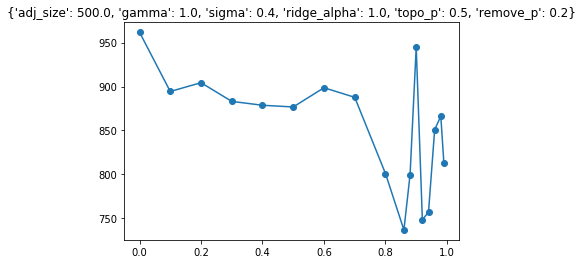